# Data Iklim Bandung dan Jakarta 2021

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

dfBandung = pd.read_csv('laporan-cuaca-bandung.csv', sep=',')
dfJakarta = pd.read_csv('laporan-cuaca-jakarta.csv', sep=',')
dfBandung['Tanggal'] = pd.to_datetime(dfBandung['Tanggal'], format='%m/%d/%Y')
dfJakarta['Tanggal'] = pd.to_datetime(dfJakarta['Tanggal'], format='%m/%d/%Y')

In [73]:
dfBandung

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2021-01-01,20.8,29.6,23.3,76.0,NaN,3.0,5,330,3,NW
1,2021-01-02,21.2,30.0,24.9,68.0,0.8,3.9,5,350,2,NE
2,2021-01-03,21.4,30.0,24.1,74.0,1.8,2.3,4,300,2,W
3,2021-01-04,20.5,28.6,23.0,79.0,6.8,4.8,5,290,3,NW
4,2021-01-05,20.4,28.0,23.4,80.0,7.2,2.6,5,280,2,W
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,21.0,30.8,24.2,80.0,0.3,5.8,4,220,1,C
361,2021-12-28,19.8,30.2,23.7,78.0,13.8,5.6,4,220,1,C
362,2021-12-29,20.3,29.6,24.2,80.0,NaN,6.0,4,280,2,W
363,2021-12-30,20.2,29.6,23.9,80.0,2.9,3.0,4,240,1,C


In [74]:
dfJakarta

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2021-01-01,25.0,30.0,27.0,80,13.8,0.0,4,310,1,C
1,2021-01-02,25.0,31.2,27.6,78,NaN,2.5,6,290,2,C
2,2021-01-03,25.0,32.4,27.9,77,NaN,3.5,8,320,2,C
3,2021-01-04,25.6,32.6,28.8,75,9.4,2.7,7,260,2,C
4,2021-01-05,26.2,29.6,28.4,76,0.0,5.2,5,310,1,C
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,24.2,30.8,28.2,77,NaN,5.0,7,330,2,C
361,2021-12-28,26.2,31.6,28.2,82,NaN,7.2,8,340,2,C
362,2021-12-29,24.6,30.8,27.5,84,9.0,3.8,4,320,1,C
363,2021-12-30,26.0,30.2,28.0,84,0.0,2.0,5,320,1,C


## Suhu

In [75]:
print("Bandung")
print(f"Suhu terendah : {dfBandung['Tn'].min()}\u00b0C ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['Tn'] == dfBandung['Tn'].min())[0],0].tolist()])})")
print(f"Suhu tertinggi : {dfBandung['Tx'].max()}\u00b0C ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['Tx'] == dfBandung['Tx'].max())[0],0].tolist()])})")
print(f"Rata-rata suhu : {round(dfBandung['Tavg'].mean(), 1)}\u00b0C\n")

print("Jakarta")
print(f"Suhu terendah : {dfJakarta['Tn'].min()}\u00b0C ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['Tn'] == dfJakarta['Tn'].min())[0],0].tolist()])})")
print(f"Suhu tertinggi : {dfJakarta['Tx'].max()}\u00b0C ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['Tx'] == dfJakarta['Tx'].max())[0],0].tolist()])})")
print(f"Rata-rata suhu : {round(dfJakarta['Tavg'].mean(), 1)}\u00b0C")

Bandung
Suhu terendah : 15.6°C (27 July 2021)
Suhu tertinggi : 32.2°C (01 March 2021, 12 October 2021)
Rata-rata suhu : 23.6°C

Jakarta
Suhu terendah : 23.0°C (11 March 2021)
Suhu tertinggi : 35.2°C (02 December 2021)
Rata-rata suhu : 28.4°C


## Kelembapan

In [76]:
print("Bandung")
print(f"Kelembapan terendah : {dfBandung['RH_avg'].min()}% ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['RH_avg'] == dfBandung['RH_avg'].min())[0],0].tolist()])})")
print(f"Kelembapan tertinggi : {dfBandung['RH_avg'].max()}% ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['RH_avg'] == dfBandung['RH_avg'].max())[0],0].tolist()])})")
print(f"Rata-rata Kelembapan : {round(dfBandung['RH_avg'].mean(), 3)}%\n")

print("Jakarta")
print(f"Kelembapan terendah : {dfJakarta['RH_avg'].min()}% ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['RH_avg'] == dfJakarta['RH_avg'].min())[0],0].tolist()])})")
print(f"Kelembapan tertinggi : {dfJakarta['RH_avg'].max()}% ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['RH_avg'] == dfJakarta['RH_avg'].max())[0],0].tolist()])})")
print(f"Rata-rata Kelembapan : {round(dfJakarta['RH_avg'].mean(), 3)}%")

Bandung
Kelembapan terendah : 58.0% (25 July 2021)
Kelembapan tertinggi : 93.0% (19 October 2021)
Rata-rata Kelembapan : 78.453%

Jakarta
Kelembapan terendah : 62% (24 November 2021)
Kelembapan tertinggi : 95% (16 February 2021)
Rata-rata Kelembapan : 77.178%


## Curah hujan

In [77]:
print("Bandung")
print(f"Curah hujan terendah : {dfBandung[dfBandung['RR'] > 0]['RR'].min()} mm ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['RR'] == dfBandung[dfBandung['RR'] > 0]['RR'].min())[0],0].tolist()])})")
print(f"Curah hujan tertinggi : {dfBandung['RR'].max()} mm ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['RR'] == dfBandung['RR'].max())[0],0].tolist()])})")
print(f"Rata-rata curah hujan : {round(dfBandung['RR'].mean(), 3)} mm\n")

print("Jakarta")
print(f"Curah hujan terendah : {dfJakarta[dfJakarta['RR'] > 0]['RR'].min()} mm ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['RR'] == dfJakarta[dfJakarta['RR'] > 0]['RR'].min())[0],0].tolist()])})")
print(f"Curah hujan tertinggi : {dfJakarta['RR'].max()} mm ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['RR'] == dfJakarta['RR'].max())[0],0].tolist()])})")
print(f"Rata-rata curah hujan : {round(dfJakarta['RR'].mean(), 3)} mm")

Bandung
Curah hujan terendah : 0.1 mm (30 June 2021)
Curah hujan tertinggi : 76.8 mm (25 May 2021)
Rata-rata curah hujan : 7.655 mm

Jakarta
Curah hujan terendah : 0.1 mm (13 March 2021)
Curah hujan tertinggi : 94.1 mm (19 February 2021)
Rata-rata curah hujan : 10.019 mm


## Lama penyinaran matahari

In [78]:
print("Bandung")
print(f"Sinar matahari tersingkat : {dfBandung[dfBandung['ss'] > 0]['ss'].min()} jam ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['ss'] == dfBandung[dfBandung['ss'] > 0]['ss'].min())[0],0].tolist()])})")
print(f"Sinar matahari terlama : {dfBandung['ss'].max()} jam ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['ss'] == dfBandung['ss'].max())[0],0].tolist()])})")
print(f"Rata-rata lama sinar matahari : {round(dfBandung['ss'].mean(), 3)} jam\n")


print("Jakarta")
print(f"Sinar matahari tersingkat : {dfJakarta[dfJakarta['ss'] > 0]['ss'].min()} jam ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['ss'] == dfJakarta[dfJakarta['ss'] > 0]['ss'].min())[0],0].tolist()])})")
print(f"Sinar matahari terlama : {dfJakarta['ss'].max()} jam ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['ss'] == dfJakarta['ss'].max())[0],0].tolist()])})")
print(f"Rata-rata lama sinar matahari : {round(dfJakarta['ss'].mean(), 3)} jam")

Bandung
Sinar matahari tersingkat : 0.1 jam (04 April 2021, 16 November 2021)
Sinar matahari terlama : 9.8 jam (06 June 2021, 19 July 2021, 26 July 2021, 29 July 2021)
Rata-rata lama sinar matahari : 4.948 jam

Jakarta
Sinar matahari tersingkat : 0.2 jam (28 January 2021, 01 February 2021, 08 March 2021, 02 April 2021, 20 November 2021)
Sinar matahari terlama : 9.8 jam (26 September 2021, 10 October 2021)
Rata-rata lama sinar matahari : 4.244 jam


## Kecepatan angin

In [79]:


print("Bandung")
print(f"Kecepatan angin terendah : {dfBandung[dfBandung['ff_avg'] > 0]['ff_avg'].min()} m/s ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung[dfBandung['ff_avg'] > 0]['ff_avg'].min())[0],0].tolist()])})")
print(f"Kecepatan angin tertinggi : {dfBandung['ff_x'].max()} m/s ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfBandung.iloc[np.where(dfBandung['ff_x'] == dfBandung['ff_x'].max())[0],0].tolist()])})")
print(f"Rata-rata kecepatan angin : {round(dfBandung['ff_avg'].mean(), 3)} m/s\n")


print("Jakarta")
print(f"Kecepatan angin terendah : {dfJakarta[dfJakarta['ff_avg'] > 0]['ff_avg'].min()} m/s ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta[dfJakarta['ff_avg'] > 0]['ff_avg'].min())[0],0].tolist()])})")
print(f"Kecepatan angin tertinggi : {dfJakarta['ff_x'].max()} m/s ({', '.join([date_obj.strftime('%d %B %Y') for date_obj in dfJakarta.iloc[np.where(dfJakarta['ff_x'] == dfJakarta['ff_x'].max())[0],0].tolist()])})")
print(f"Rata-rata kecepatan angin : {round(dfJakarta['ff_avg'].mean(), 3)} m/s")

Bandung
Kecepatan angin terendah : 1 m/s (01 January 2021)
Kecepatan angin tertinggi : 9 m/s (25 February 2021)
Rata-rata kecepatan angin : 1.597 m/s

Jakarta
Kecepatan angin terendah : 1 m/s (01 January 2021)
Kecepatan angin tertinggi : 10 m/s (06 January 2021, 16 January 2021, 04 February 2021, 23 February 2021, 25 February 2021, 05 March 2021, 06 April 2021)
Rata-rata kecepatan angin : 1.477 m/s


## Grafik suhu

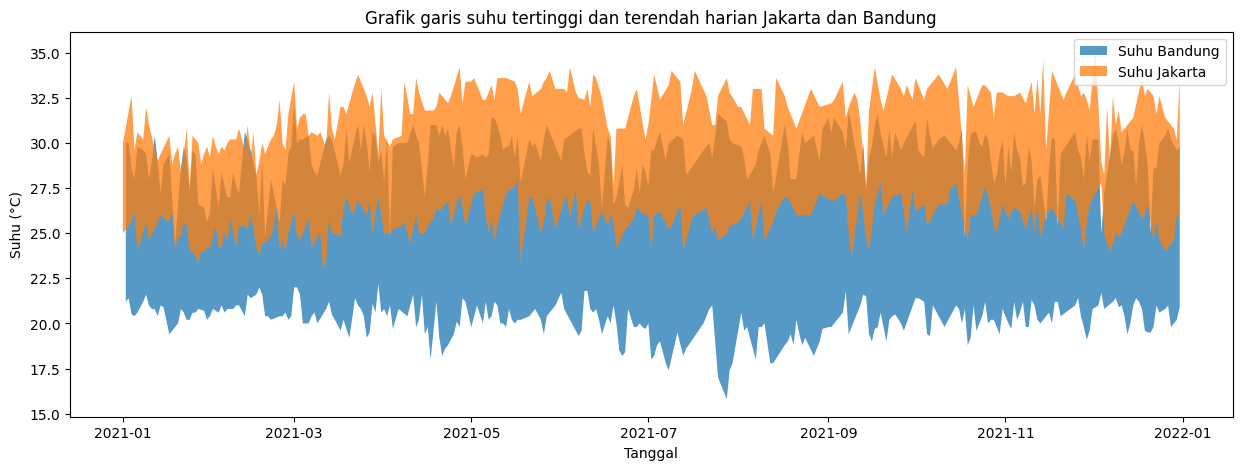

In [80]:
plt.figure(figsize=(15, 5))
plt.title("Grafik garis suhu tertinggi dan terendah harian Jakarta dan Bandung")
# Bandung
plt.fill_between(dfBandung.dropna()['Tanggal'], dfBandung.dropna()['Tn'], dfBandung.dropna()['Tx'], alpha=.75)

# Jakarta
plt.fill_between(dfJakarta.dropna()['Tanggal'], dfJakarta.dropna()['Tn'], dfJakarta.dropna()['Tx'], alpha=.75)

plt.xlabel('Tanggal')
plt.ylabel('Suhu (\u00b0C)')
plt.legend(['Suhu Bandung', 'Suhu Jakarta'])
plt.show()

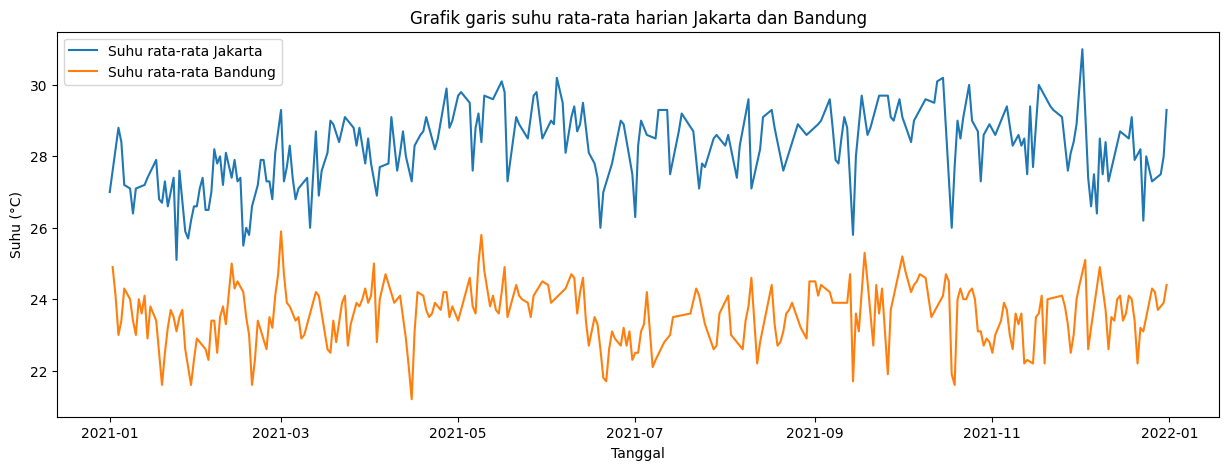

In [81]:
plt.figure(figsize=(15, 5))
plt.title("Grafik garis suhu rata-rata harian Jakarta dan Bandung")
# Jakarta
plt.plot(dfJakarta.dropna()['Tanggal'], dfJakarta.dropna()['Tavg'])

# Bandung
plt.plot(dfBandung.dropna()['Tanggal'], dfBandung.dropna()['Tavg'])

plt.xlabel('Tanggal')
plt.ylabel('Suhu (\u00b0C)')
plt.legend(['Suhu rata-rata Jakarta', 'Suhu rata-rata Bandung'])
plt.show()

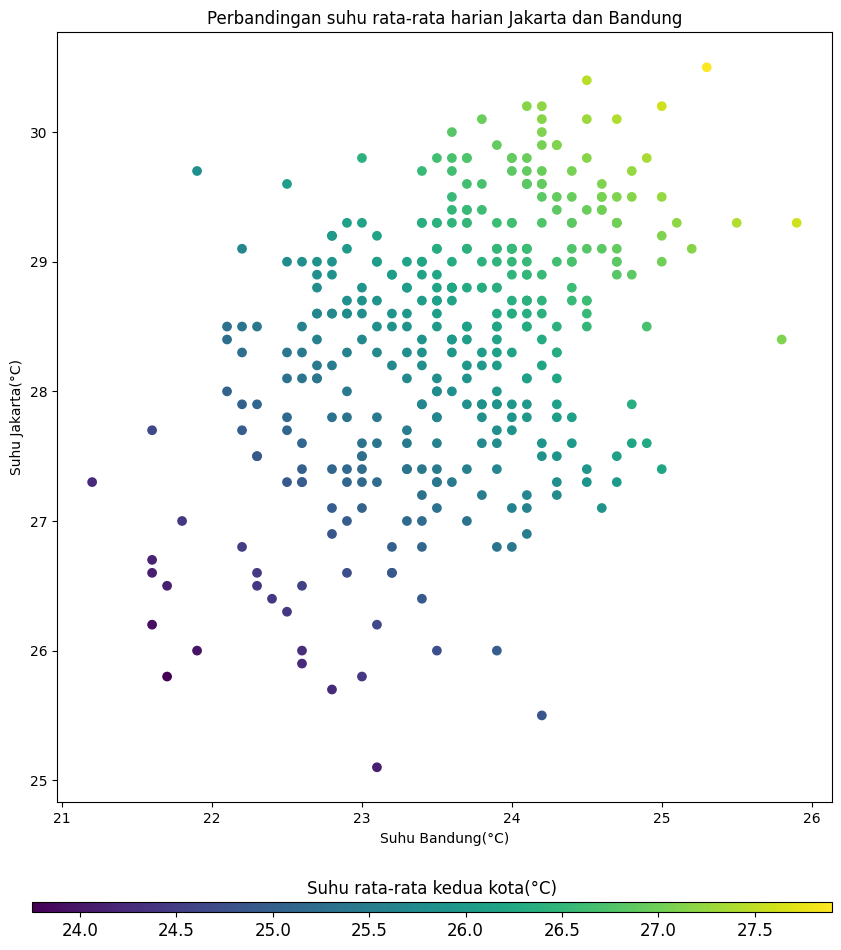

Koefisien korelasi suhu rata-rata : 0.418


In [82]:
plt.figure(figsize=(10,10))
plt.title('Perbandingan suhu rata-rata harian Jakarta dan Bandung')
plt.scatter(dfBandung['Tavg'], dfJakarta['Tavg'], c=(dfBandung['Tavg'] + dfJakarta['Tavg'])/2)
plt.xlabel('Suhu Bandung(\u00b0C)')
plt.ylabel('Suhu Jakarta(\u00b0C)')
cax = plt.axes([0.1, 0, 0.8, 0.01])
clb=plt.colorbar(cax=cax,orientation="horizontal")
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('Suhu rata-rata kedua kota(\u00b0C)',fontsize=12)
plt.show()
print(f"Koefisien korelasi suhu rata-rata : {round(dfBandung['Tavg'].corr(dfJakarta['Tavg']), 3)}")

## Grafik Kelembapan

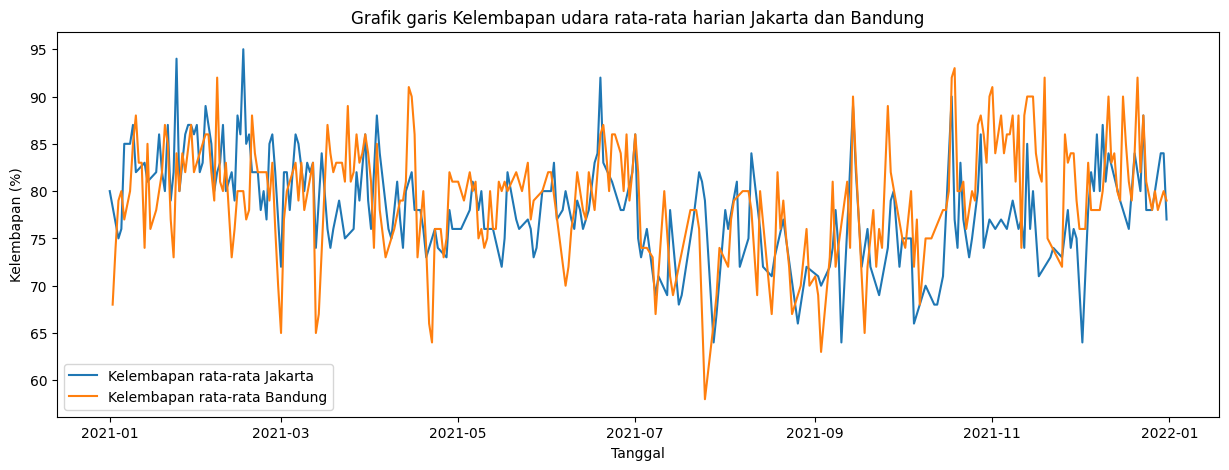

In [83]:
plt.figure(figsize=(15,5))
plt.title('Grafik garis Kelembapan udara rata-rata harian Jakarta dan Bandung')
# Jakarta
plt.plot(dfJakarta.dropna()['Tanggal'], dfJakarta.dropna()['RH_avg'])

# Bandung
plt.plot(dfBandung.dropna()['Tanggal'], dfBandung.dropna()['RH_avg'])

plt.xlabel('Tanggal')
plt.ylabel('Kelembapan (%)')
plt.legend(['Kelembapan rata-rata Jakarta', 'Kelembapan rata-rata Bandung'])
plt.show()

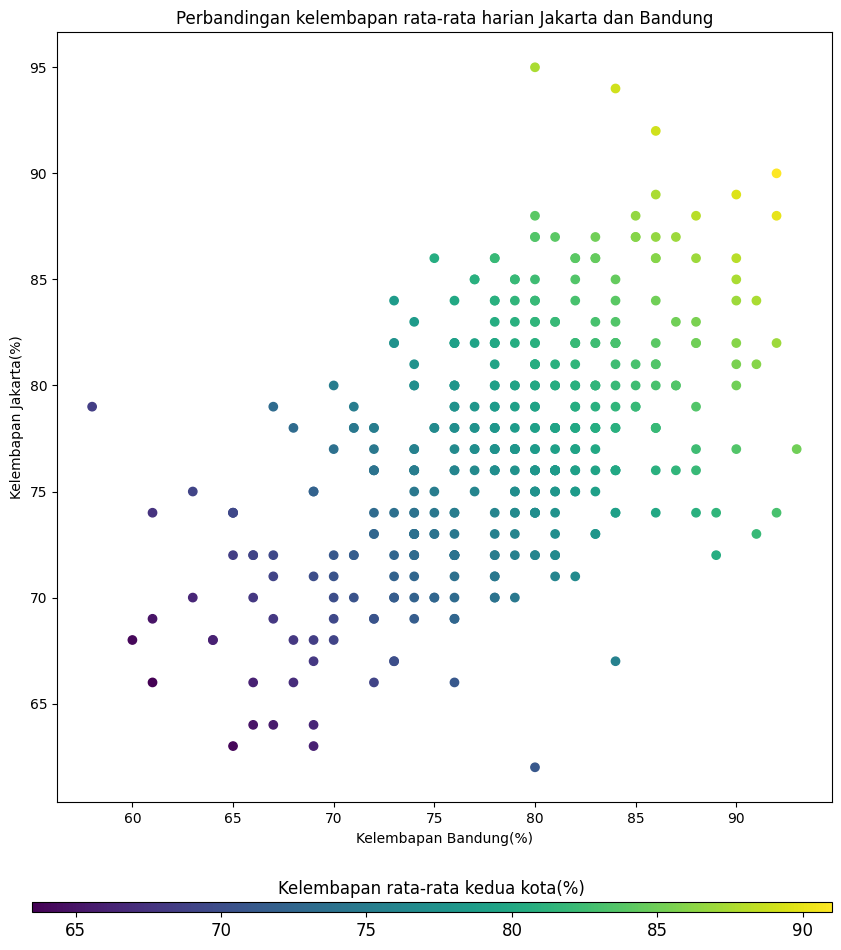

Koefisien korelasi kelembapan rata-rata : 0.543


In [86]:
plt.figure(figsize=(10,10))
plt.title('Perbandingan kelembapan rata-rata harian Jakarta dan Bandung')
plt.scatter(dfBandung['RH_avg'], dfJakarta['RH_avg'], c=(dfBandung['RH_avg'] + dfJakarta['RH_avg'])/2)
plt.xlabel('Kelembapan Bandung(%)')
plt.ylabel('Kelembapan Jakarta(%)')
cax = plt.axes([0.1, 0, 0.8, 0.01])
clb=plt.colorbar(cax=cax,orientation="horizontal")
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('Kelembapan rata-rata kedua kota(%)',fontsize=12)
plt.show()
print(f"Koefisien korelasi kelembapan rata-rata : {round(dfBandung['RH_avg'].corr(dfJakarta['RH_avg']), 3)}")